In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.integrate import solve_ivp

In [21]:
current_Omega = 4
current_A_ext = 4

In [22]:
def sine_map(theta_n, A_ext, Omega):
    return theta_n - A_ext*np.sin(theta_n) + 2*np.pi * Omega

In [23]:
def integrate(iterations):
    theta_n_hist = [np.pi/4]
    for iterations in range(iterations):
        theta_n_hist.append(sine_map(theta_n_hist[-1], current_A_ext, current_Omega))

    return theta_n_hist  

In [24]:
theta_sim = integrate(300)
xxs = np.arange(len(theta_sim))

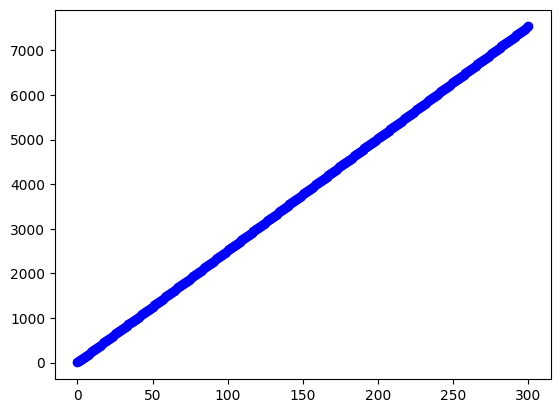

In [25]:
plt.plot(xxs, theta_sim, 'bo')

# Arnold Tongues

In [8]:
def run_simulation(iterations, theta_range):
    all_simulations = []
    for theta0 in theta_range:
        theta_n_hist = [np.random.uniform(0, 1)]
        for iterations in range(iterations):
            theta_n_hist.append(sine_map(theta_n_hist[-1], current_A_ext, current_Omega))
        
        all_simulations.append([theta0, theta_n_hist[300:]])
    
    return all_simulations

In [11]:
theta_range = np.linspace(0, 3, 1000)
results = run_simulation(1000, theta_range)

theta_values = [sim[0] for sim in results]
hist = [sim[1] for sim in results]

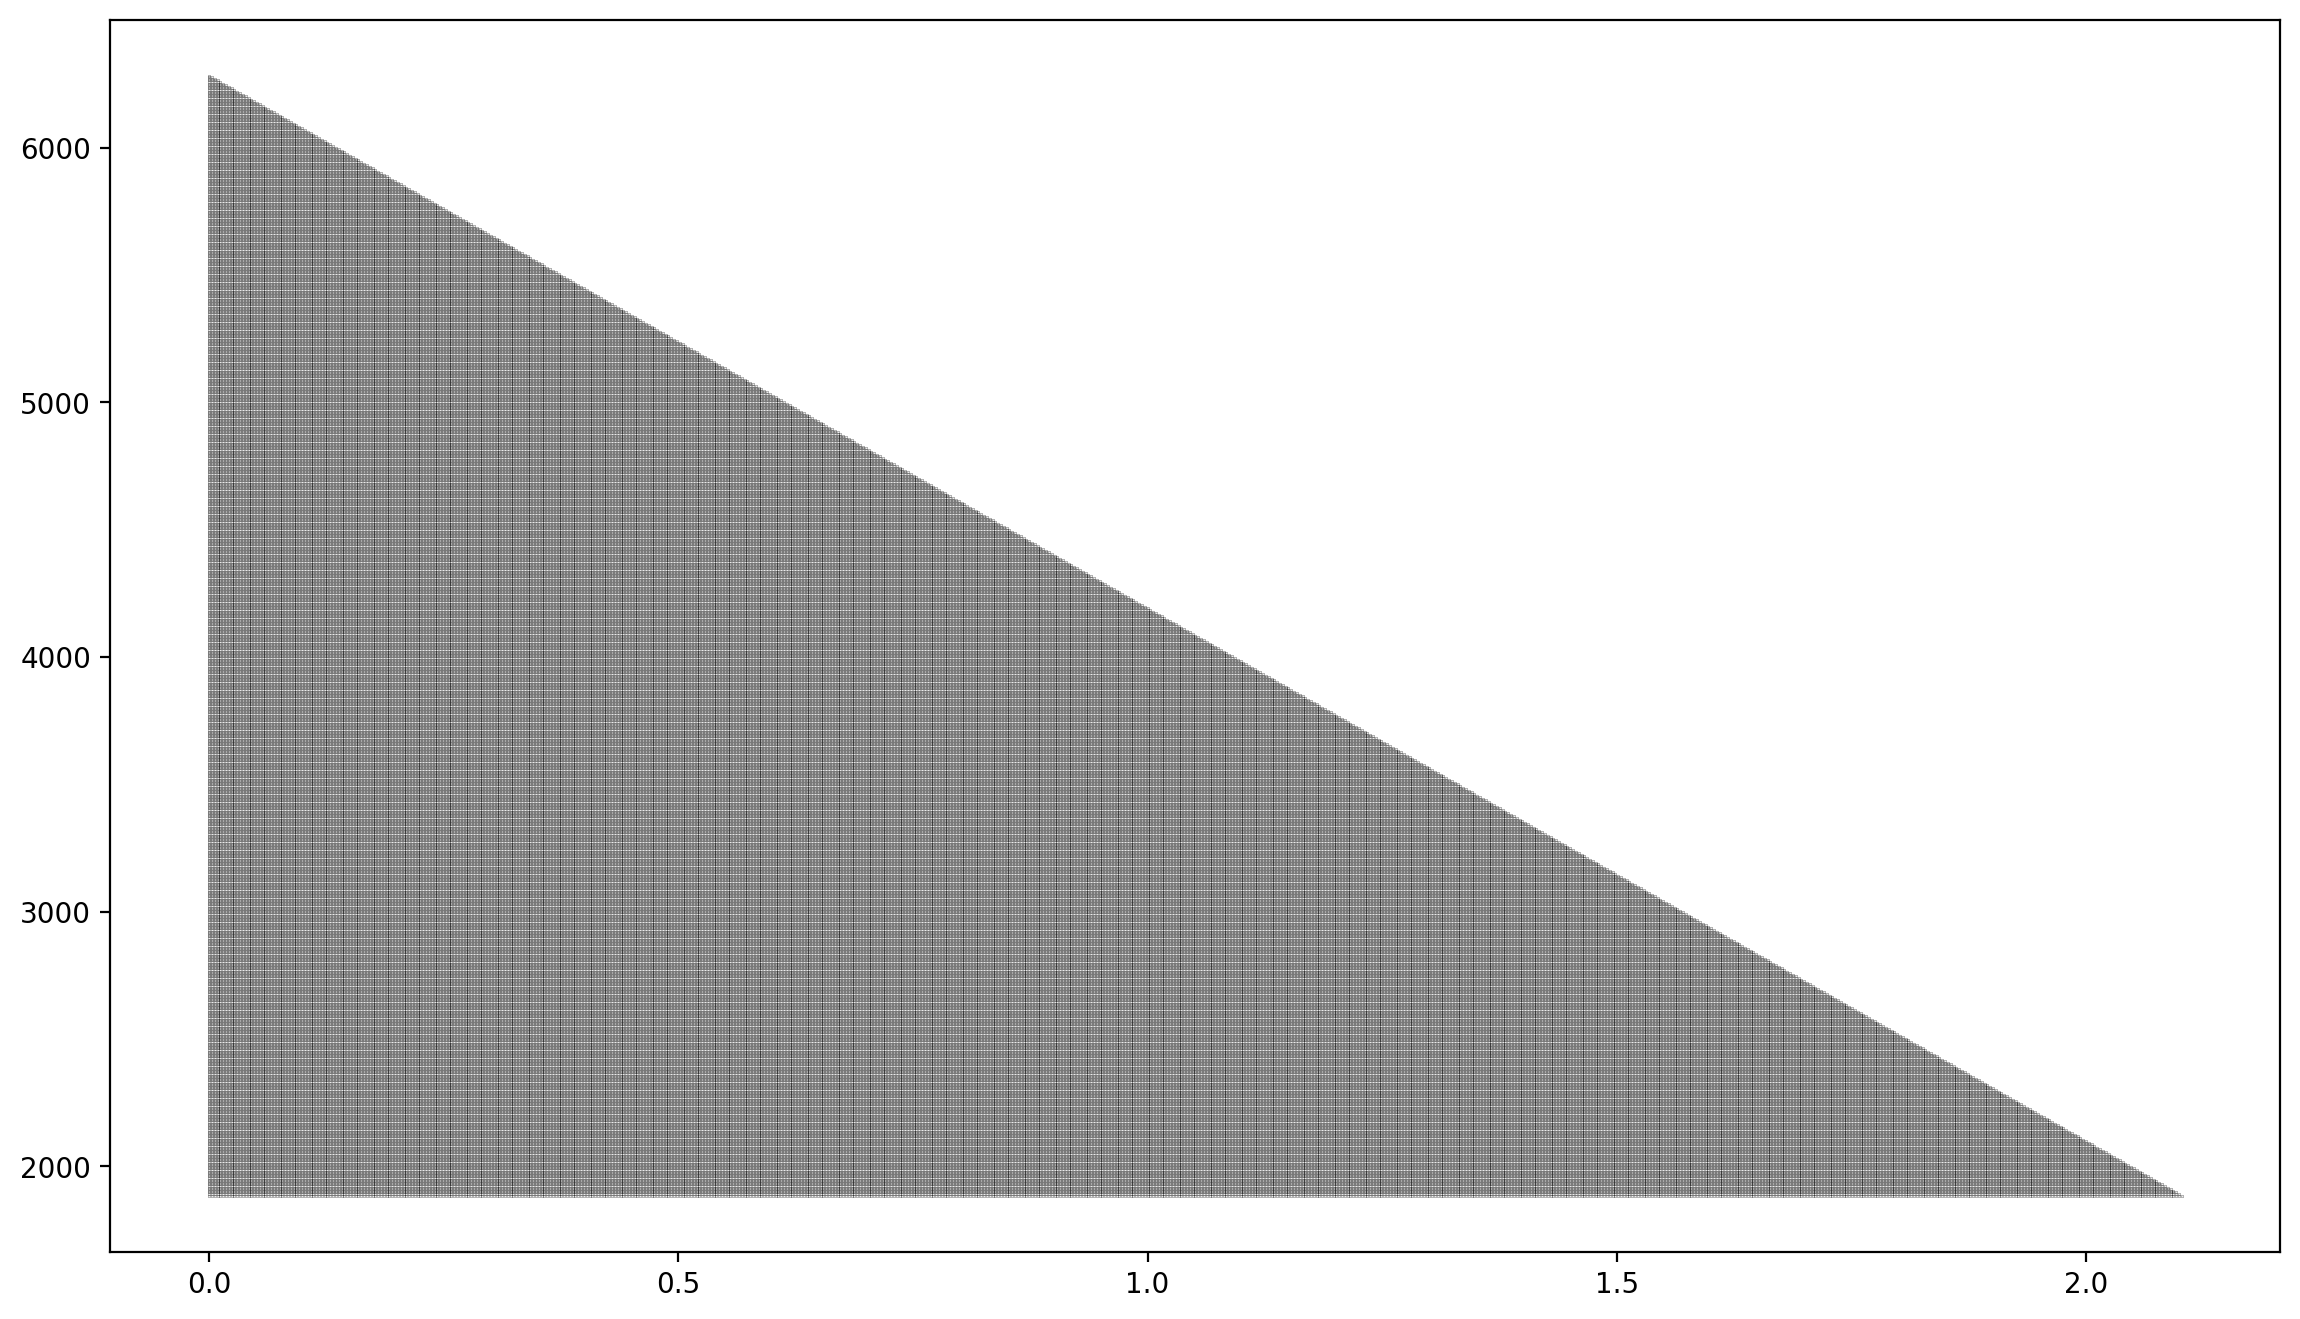

In [12]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=200)
for i, r_value in enumerate(theta_values):
    ax.scatter(np.ones(len(hist[i])) * r_value, hist[i], color="black", s=0.01)